In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw(original, product):
    xs = [p[0] for p in original]
    ys = [p[1] for p in original]
    xs.append(original[0][0])
    ys.append(original[0][1])

    xd = [p[0] for p in product]
    yd = [p[1] for p in product]
    xd.append(product[0][0])
    yd.append(product[0][1])

    plt.plot(xs, ys)
    plt.plot(xd, yd)
    plt.legend(['original', 'slika'])
    plt.show()

In [3]:
# originalne tacke
original_points = [[-3, -1, 1],
                    [3, -1, 1],
                    [1, 1, 1],
                    [-1, 1, 1]]

# slike tacaka
product_points = [[-2, -1, 1],
                  [2, -1, 1],
                  [2, 1, 1],
                  [-2, 1, 1]]


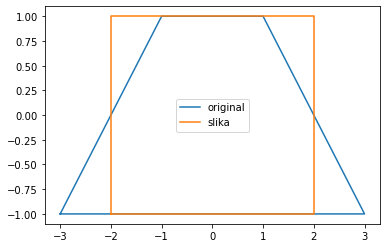

In [4]:
# Graficki prikaz
draw(original_points, product_points)

# NAIVNI ALGORITAM

In [5]:
#D=gamma1*A+gamma2*B+gamma2*C


In [6]:
def find_matrix(x):
    matrix = np.array([ # A, B, C
        [x[0][0], x[1][0], x[2][0]],
        [x[0][1], x[1][1], x[2][1]],
        [x[0][2], x[1][2], x[2][2]]
    ])

    D = np.array([x[3][0], x[3][1], x[3][2]])

    #    D=gamma1*A+gamma2*B+gamma2*C

    result = np.linalg.solve(matrix, D)

    gamma1 = result[0]
    gamma2 = result[1]
    gamma3 = result[2]

    column1= np.array([gamma1*x[0][0], gamma1*x[0][1], gamma1*x[0][2]])
    column2= np.array([gamma2*x[1][0], gamma2*x[1][1], gamma2*x[1][2]])
    column3= np.array([gamma3*x[2][0], gamma3*x[2][1], gamma3*x[2][2]])

    P = np.column_stack([column1, column2, column3])

    return P

def naive_algorithm(original, product):

    P1 = find_matrix(original)
    P2 = find_matrix(product)

    # P = P2*inv(P1)
    P = np.dot(P2, np.linalg.inv(P1))

    return P


In [7]:
P_naive = naive_algorithm(original_points, product_points)
P_naive = P_naive.round(5)
print("Matrica projektivnog preslikavanja dobijena naivnim algoritmom:")
print(P_naive)

Matrica projektivnog preslikavanja dobijena naivnim algoritmom:
[[ 2. -0.  0.]
 [-0.  2. -1.]
 [ 0. -1.  2.]]


# DLT ALGORITAM

In [8]:
def dlt(original, product):
    x = original[0][0]
    y = original[0][1]
    z = original[0][2]

    xp = product[0][0]
    yp = product[0][1]
    zp = product[0][2]

    A = np.array([
        [   0,    0,    0, -zp*x, -zp*y, -zp*z,  yp*x,  yp*y,  yp*z],
        [zp*x, zp*y, zp*z,     0,     0,     0, -xp*x, -xp*y, -xp*z]
    ])

    for i in range(1, len(original)):
        x = original[i][0]
        y = original[i][1]
        z = original[i][2]

        xp = product[i][0]
        yp = product[i][1]
        zp = product[i][2]

        row1 = np.array([0, 0, 0, -zp*x, -zp*y, -zp*z, yp*x, yp*y, yp*z])
        row2 = np.array([zp*x, zp*y, zp*z, 0, 0, 0, -xp*x, -xp*y, -xp*z])

        A = np.vstack((A, row1))
        A = np.vstack((A, row2))

    M, N, L = np.linalg.svd(A)

    P = L[-1].reshape(3,3)
    
    return P

In [9]:
P_dlt = dlt(original_points, product_points)
print("Matrica projektivnog preslikavanja dobijena DLT algoritmom")
print(P_dlt.round(5))

Matrica projektivnog preslikavanja dobijena DLT algoritmom
[[ 0.53452  0.      -0.     ]
 [-0.       0.53452 -0.26726]
 [-0.      -0.26726  0.53452]]


# Poredjenje DLT i naivnog algoritma

In [10]:
P_dlt = (P_dlt / P_dlt[0, 0]) * P_naive[0, 0]
print(P_dlt.round(5))

[[ 2.  0. -0.]
 [-0.  2. -1.]
 [-0. -1.  2.]]


kao sto vidimo dobili smo istu matricu kao i preko naivnog algoritma ali cisto da proverimo da li su stvarno iste

In [11]:
P_dlt.round(5) == P_naive.round(5)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])